Aquisição de dados via API da Binance

In [51]:
from binance.client import Client
import pandas as pd

api_key = '5Grhycmiv52kLL4dwz635R91N94a6KYbG21ixok0fRqtFWuu17WBrZRBUTu1QdHm'
api_secret = 'z8DYVbeIxBAXIv0OUrvz4Sh1xDdV2GbESnJYAtsKMfuJIYL6Q6gy1eE8ICTBxDhK'
symbol = 'BTCUSDT'
interval = '1d'

# Defina as datas de início e término
start_date = '2017-01-01'
end_date = '2022-12-31'

# Converta as datas para timestamps em milissegundos corretamente
start_timestamp = int(pd.Timestamp(start_date).timestamp() * 1000)
end_timestamp = int(pd.Timestamp(end_date).timestamp() * 1000)

client = Client(api_key, api_secret)

# Inicialize uma lista para armazenar os dados
all_klines = []

# Número máximo de candles por solicitação (limitação da API Binance)
limit = 1000

# Faça chamadas repetidas para obter todos os dados
while True:
    # Obtenha o histórico de preços (candles) para o par de negociação e intervalo especificados
    klines = client.get_klines(symbol=symbol, interval=interval, startTime=start_timestamp, endTime=end_timestamp, limit=limit)

    # Adicione os dados à lista
    all_klines.extend(klines)

    # Se o número de candles retornados for menor que o limite, terminamos
    if len(klines) < limit:
        break

    # Atualize a data de início para a próxima chamada
    start_timestamp = int(klines[-1][0]) + 1

# Estrutura dos dados para DataFrame
columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore']
df = pd.DataFrame(all_klines, columns=columns)

# Converta os timestamps para formato legível
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

# Exiba o DataFrame com os dados
print(df)

      timestamp            open            high             low  \
0    2017-08-17   4261.48000000   4485.39000000   4200.74000000   
1    2017-08-18   4285.08000000   4371.52000000   3938.77000000   
2    2017-08-19   4108.37000000   4184.69000000   3850.00000000   
3    2017-08-20   4120.98000000   4211.08000000   4032.62000000   
4    2017-08-21   4069.13000000   4119.62000000   3911.79000000   
...         ...             ...             ...             ...   
1958 2022-12-27  16919.39000000  16972.83000000  16592.37000000   
1959 2022-12-28  16706.06000000  16785.19000000  16465.33000000   
1960 2022-12-29  16547.32000000  16664.41000000  16488.91000000   
1961 2022-12-30  16633.47000000  16677.35000000  16333.00000000   
1962 2022-12-31  16607.48000000  16644.09000000  16470.00000000   

               close           volume     close_time   quote_asset_volume  \
0      4285.08000000     795.15037700  1503014399999     3454770.05073206   
1      4108.37000000    1199.88826400  15

Rede LSTM

In [52]:
#pegando dados apenas de fechamento 
data = df[['timestamp','close']]
print(data)

      timestamp           close
0    2017-08-17   4285.08000000
1    2017-08-18   4108.37000000
2    2017-08-19   4139.98000000
3    2017-08-20   4086.29000000
4    2017-08-21   4016.00000000
...         ...             ...
1958 2022-12-27  16706.36000000
1959 2022-12-28  16547.31000000
1960 2022-12-29  16633.47000000
1961 2022-12-30  16607.48000000
1962 2022-12-31  16542.40000000

[1963 rows x 2 columns]


In [53]:
import torch

#Determinando o processamento em GPU
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(device)

cuda:0


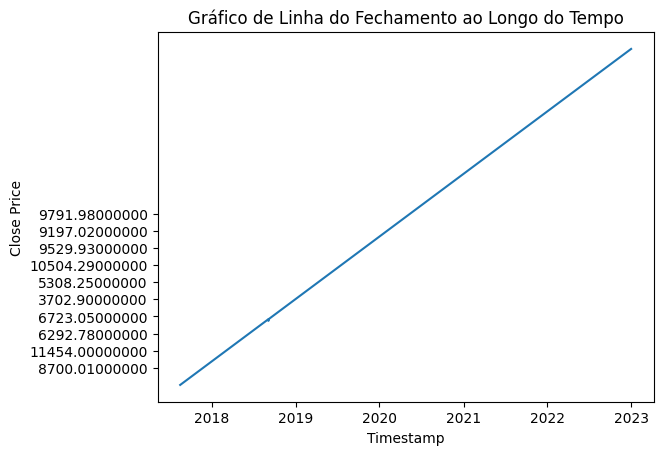

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

data['timestamp'] = pd.to_datetime(data['timestamp'])


#plt.plot(data['timestamp'],data['close'])
plt.show(data)
